<a href="https://colab.research.google.com/github/ikripaka/blockchain/blob/main/lab1/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторна робота №1 “Захищенiсть вiд атак подвiйних витрат у мережах з повiльною синхронiзацiєю”

In [ ]:
import math
from decimal import *
import matplotlib.pyplot as plt
import scipy.special as ss
import sympy as sp
from prettytable import PrettyTable

### Відповідно до 2 варіанту маємо наступні константи

In [ ]:
a_h = 0.0008
a_m = 0.0004
a = a_h + a_m
Dh = 45

### 1) Обчислення порогу стійкості $p_{st}$

In [ ]:
def calc_stability_threshold(g):
    x = sp.symbols('x')
    f = sp.exp(g * x) * 0.5 + x
    sol = sp.solve(sp.Eq(f, 1), x)
    print('p_st = ', sol)


calc_stability_threshold(a * Dh)

p_st =  [0.486685301377169]


### 2) Обчислення ймовірності "наздогнати" вітку чесних майнерів шахраями

In [ ]:
# calculating p_h^'
def p1(a_m, D_h, p_h):
    p_h1 = math.exp(-a_m * D_h) * p_h
    p_m1 = 1 - p_h1
    return p_h1, p_m1


p_h1, p_m1 = p1(a_m, Dh, a_h / a)
n = []
q = []
table = PrettyTable(["n", "q"])
for i in range(1, 12):
    n.append(i)
    q.append(1 if p_m1 > p_h1 else (p_m1 / p_h1) ** i)
    table.add_row([i, round(q[i - 1], 6)])
print(table)

+----+----------+
| n  |    q     |
+----+----------+
| 1  | 0.527244 |
| 2  | 0.277987 |
| 3  | 0.146567 |
| 4  | 0.077277 |
| 5  | 0.040744 |
| 6  | 0.021482 |
| 7  | 0.011326 |
| 8  | 0.005972 |
| 9  | 0.003149 |
| 10 | 0.00166  |
| 11 | 0.000875 |
+----+----------+


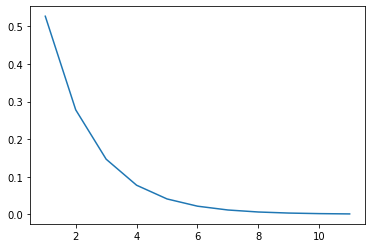

In [ ]:
plt.plot(n, q)
plt.show()

### 3) Обчислення мінімальної кількості блоків підтвердження, які гарантують, що ймовірність успішної атаки подвійної витрати $\leq 10^{-3}$

In [ ]:
a = Decimal('0.0012')

In [ ]:
# Same function as <p1> but in decimal numbers
def p2(a_m, D_h, p_h):
    p_h1 = (-a_m * D_h).exp() * p_h
    p_m1 = 1 - p_h1
    return p_h1, p_m1

# Calculating P_n(k)
def P(a_m, D_h, a, p_h, n, k):
    p = 0
    for i in range(0, k + 1):
        p += Decimal(math.factorial(n + i - 1)) * Decimal(ss.binom(k, i)) / (a * n * D_h) ** i
    p *= p_h ** n / Decimal(math.factorial(n - 1))
    p *= (-a_m * n * D_h).exp() * (a_m * n * D_h) ** k / Decimal(math.factorial(k))
    return p


# Calculating p(z) -- probability of success by the MMs after z confirmation blocks
def calc_success_probability(a, D_h, p_m):
    p_h1, p_m1 = p2(a * p_m, D_h, 1 - p_m)
    p = 1
    z = 0
    if p_m1 < p_h1:
        while p > 0.001:
            z += 1
            p = 1
            for k in range(0, z + 1):
                p -= P(a * p_m, D_h, a, 1 - p_m, z, k) * (1 - (p_m1 / p_h1) ** (z - k))
    return z

**Обчислюємо для гешрейту зловмисника $p_M = 0.15$**

In [ ]:
p_m = Decimal('0.15')
d_h = []
z = []
table1 = PrettyTable(["Dh", "z"])
for d in range(1, 181):
    d_h.append(d)
    z.append(calc_success_probability(a, d, p_m))
    table1.add_row([d, round(z[d - 1], 6)])
print(table1)

+-----+----+
|  Dh | z  |
+-----+----+
|  1  | 9  |
|  2  | 9  |
|  3  | 9  |
|  4  | 9  |
|  5  | 9  |
|  6  | 9  |
|  7  | 9  |
|  8  | 9  |
|  9  | 9  |
|  10 | 9  |
|  11 | 9  |
|  12 | 9  |
|  13 | 9  |
|  14 | 9  |
|  15 | 9  |
|  16 | 9  |
|  17 | 9  |
|  18 | 9  |
|  19 | 9  |
|  20 | 9  |
|  21 | 9  |
|  22 | 9  |
|  23 | 9  |
|  24 | 9  |
|  25 | 9  |
|  26 | 9  |
|  27 | 9  |
|  28 | 9  |
|  29 | 9  |
|  30 | 9  |
|  31 | 9  |
|  32 | 9  |
|  33 | 9  |
|  34 | 9  |
|  35 | 9  |
|  36 | 9  |
|  37 | 9  |
|  38 | 9  |
|  39 | 9  |
|  40 | 9  |
|  41 | 9  |
|  42 | 9  |
|  43 | 9  |
|  44 | 9  |
|  45 | 9  |
|  46 | 9  |
|  47 | 9  |
|  48 | 9  |
|  49 | 9  |
|  50 | 9  |
|  51 | 9  |
|  52 | 9  |
|  53 | 9  |
|  54 | 9  |
|  55 | 9  |
|  56 | 9  |
|  57 | 9  |
|  58 | 9  |
|  59 | 9  |
|  60 | 9  |
|  61 | 9  |
|  62 | 9  |
|  63 | 9  |
|  64 | 9  |
|  65 | 9  |
|  66 | 9  |
|  67 | 9  |
|  68 | 9  |
|  69 | 9  |
|  70 | 9  |
|  71 | 9  |
|  72 | 9  |
|  73 | 9  |
|  74 | 9  |

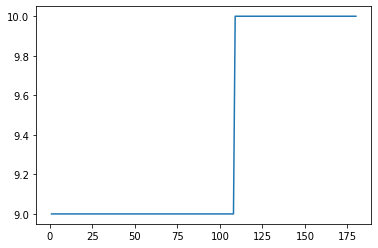

In [ ]:
plt.plot(d_h, z)
plt.show()

**Обчислюємо для гешрейту зловмисника $p_M = 0.25$**

In [ ]:
p_m = Decimal('0.25')
d_h = []
z = []
table2 = PrettyTable(["Dh", "z"])
for d in range(1, 181):
    d_h.append(d)
    z.append(calc_success_probability(a, d, p_m))
    table2.add_row([d, round(z[d - 1], 6)])
print(table2)

+-----+----+
|  Dh | z  |
+-----+----+
|  1  | 20 |
|  2  | 20 |
|  3  | 20 |
|  4  | 20 |
|  5  | 20 |
|  6  | 20 |
|  7  | 20 |
|  8  | 20 |
|  9  | 20 |
|  10 | 20 |
|  11 | 20 |
|  12 | 20 |
|  13 | 20 |
|  14 | 20 |
|  15 | 20 |
|  16 | 20 |
|  17 | 20 |
|  18 | 20 |
|  19 | 20 |
|  20 | 20 |
|  21 | 20 |
|  22 | 20 |
|  23 | 20 |
|  24 | 20 |
|  25 | 20 |
|  26 | 20 |
|  27 | 20 |
|  28 | 20 |
|  29 | 20 |
|  30 | 20 |
|  31 | 20 |
|  32 | 20 |
|  33 | 20 |
|  34 | 20 |
|  35 | 20 |
|  36 | 20 |
|  37 | 20 |
|  38 | 20 |
|  39 | 21 |
|  40 | 21 |
|  41 | 21 |
|  42 | 21 |
|  43 | 21 |
|  44 | 21 |
|  45 | 21 |
|  46 | 21 |
|  47 | 21 |
|  48 | 21 |
|  49 | 21 |
|  50 | 21 |
|  51 | 21 |
|  52 | 21 |
|  53 | 21 |
|  54 | 21 |
|  55 | 21 |
|  56 | 21 |
|  57 | 21 |
|  58 | 21 |
|  59 | 21 |
|  60 | 21 |
|  61 | 21 |
|  62 | 21 |
|  63 | 21 |
|  64 | 21 |
|  65 | 21 |
|  66 | 21 |
|  67 | 21 |
|  68 | 21 |
|  69 | 21 |
|  70 | 21 |
|  71 | 21 |
|  72 | 21 |
|  73 | 21 |
|  74 | 21 |

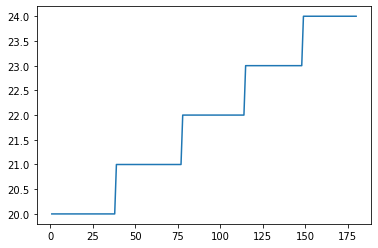

In [ ]:
plt.plot(d_h, z)
plt.show()

**Обчислюємо для гешрейту зловмисника $p_M = 0.4$**

In [ ]:
p_m = Decimal('0.4')
d_h = []
z = []
table3 = PrettyTable(["Dh", "z"])
for d in range(1, 181):
    d_h.append(d)
    z.append(calc_success_probability(a, d, p_m))
    table3.add_row([d, round(z[d - 1], 6)])
print(table3)

+-----+-----+
|  Dh |  z  |
+-----+-----+
|  1  | 134 |
|  2  | 134 |
|  3  | 135 |
|  4  | 135 |
|  5  | 136 |
|  6  | 136 |
|  7  | 136 |
|  8  | 137 |
|  9  | 137 |
|  10 | 138 |
|  11 | 138 |
|  12 | 139 |
|  13 | 139 |
|  14 | 140 |
|  15 | 140 |
|  16 | 141 |
|  17 | 141 |
|  18 | 142 |
|  19 | 142 |
|  20 | 142 |
|  21 | 143 |
|  22 | 143 |
|  23 | 144 |
|  24 | 144 |
|  25 | 145 |
|  26 | 145 |
|  27 | 146 |
|  28 | 146 |
|  29 | 147 |
|  30 | 147 |
|  31 | 148 |
|  32 | 148 |
|  33 | 149 |
|  34 | 149 |
|  35 | 150 |
|  36 | 150 |
|  37 | 151 |
|  38 | 151 |
|  39 | 152 |
|  40 | 153 |
|  41 | 153 |
|  42 | 154 |
|  43 | 154 |
|  44 | 155 |
|  45 | 155 |
|  46 | 156 |
|  47 | 156 |
|  48 | 157 |
|  49 | 157 |
|  50 | 158 |
|  51 | 159 |
|  52 | 159 |
|  53 | 160 |
|  54 | 160 |
|  55 | 161 |
|  56 | 161 |
|  57 | 162 |
|  58 | 163 |
|  59 | 163 |
|  60 | 164 |
|  61 | 164 |
|  62 | 165 |
|  63 | 166 |
|  64 | 166 |
|  65 | 167 |
|  66 | 167 |
|  67 | 168 |
|  68 | 169 |
|  69 

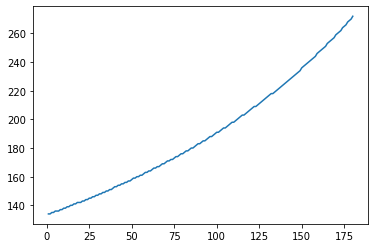

In [ ]:
plt.plot(d_h, z)
plt.show()